In [175]:
#...Por Caroliny Suque...13/12/2021....LABTDF
from intersect import intersection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np #Numpy para manipulações algébricas
import matplotlib.pyplot as plt #matplotlib para plotar gráficos
import pandas as pd #pandas para manipulação de dados
import seaborn as sns #seaborn visualização estatística
import matplotlib.ticker as ticker
from datetime import date
from itertools import *
import matplotlib.dates as mdates
import numpy as np
import time
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We will need to access some of these matplotlib classes directly
from matplotlib.lines import Line2D # For points and lines
from matplotlib.patches import Patch # For KDE and other plots
from matplotlib.legend import Legend

from matplotlib import cm

In [3]:
path = r'/home/caroliny/Documentos/datavale/Perfis desgastados/EFC-10-01-21' 
os.chdir(path) 

In [4]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    
    'xtick.color': 'black', #color: 'white' porque a tela é preta
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'axes.titlesize': 20,
    'figure.figsize': (25,10)
})

# Configurando para warnings do pandas não aparecerem
pd.options.mode.chained_assignment = None

# Ignorando Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
EFC_DES = pd.read_csv('Indice_DES-2020.csv')
EFC_INT = pd.read_csv('Indice_INT-2020.csv')
EFC_FAD = pd.read_csv('Indice_FAD-2020.csv')
Design_3 = pd.read_csv('Indice_Design3.csv')
OTM_DES = pd.read_csv('Indice_DES-2021.csv')
OTM_INT = pd.read_csv('Indice_INT-2021.csv')
OTM_FAD = pd.read_csv('Indice_FAD-2021.csv')

In [7]:
for df in [Design_3,EFC_DES,EFC_INT,EFC_FAD,OTM_DES,OTM_INT,OTM_FAD]:
    df.drop(['Unnamed: 0'], axis =1, inplace=True)

In [8]:
for df in [Design_3,EFC_DES,EFC_INT,EFC_FAD,OTM_DES,OTM_INT,OTM_FAD]:
    df['flange_height'] = df['flange_height']*1000
    df['flange_width']= df['flange_width']*1000
    df['thread_maximum']= df['thread_maximum']*1000
    df['x_thread_maximum']= df['x_thread_maximum']*1000
    df['thread_tape']= df['thread_tape']*1000

In [9]:
def find_closest(A, target):
    #A must be sorted
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx

In [10]:
idx = find_closest(Design_3['thread_tape'], 3)
for df in [Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD]:
    df['porcentagem'] = (df['kilometragem']/Design_3['kilometragem'][idx])*100

In [11]:
def plotkm(yy,y,dados, perfil):
    
    #x1 = list(np.arange(0,115,1)) 
    #y1 = np.full(115,2)
    #y2 = np.full(115,2.5)
    #y3 = np.full(115,3)
        
    a = 9
    
    palette = sns.color_palette("tab10")

    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_style("white")
    
    for df,i,name in zip(dados,range(0,7),perfil):
    
        ax = sns.lineplot(data = df, x='porcentagem', y=y , color = palette[i], lw = 1.0, label='%s' % name)
        #ax = sns.scatterplot(data = df, x='porcentagem', y=y , color = palette[i], s = 5, label='%s' % name)
    
    #plt.plot(x1,y1,x1,y2,x1,y3, linestyle = 'dashed',  color = 'silver')
    ax.set_xlabel("Distância Equivalente [%]",fontsize=18)
    ax.set_ylabel('%s [mm]' % yy,fontsize=18) 
    ax.set(ylim=(0,None),xlim=(0,None))
    #plt.legend(loc='upper right',ncol=2,fontsize=18)  
    #plt.legend(loc='lower right',ncol=2,fontsize=18)  
    plt.savefig("{}_{}.pdf".format(y,a))
    plt.show()

In [91]:
def limite(data):
    p = pd.DataFrame()
    aux = []
    for i in [2, 2.5, 3]:
        idx = find_closest(data['thread_tape'], i)
        aux.append(idx)

    p = data.loc[data.index.isin(aux)]
    return p

In [97]:
p_Design_3 = limite(Design_3)
p_EFC_DES = limite(EFC_DES)
p_EFC_INT = limite(EFC_INT)
p_EFC_FAD = limite(EFC_FAD)
p_OTM_DES = limite(OTM_DES)
p_OTM_INT = limite(OTM_INT)
p_OTM_FAD = limite(OTM_FAD)

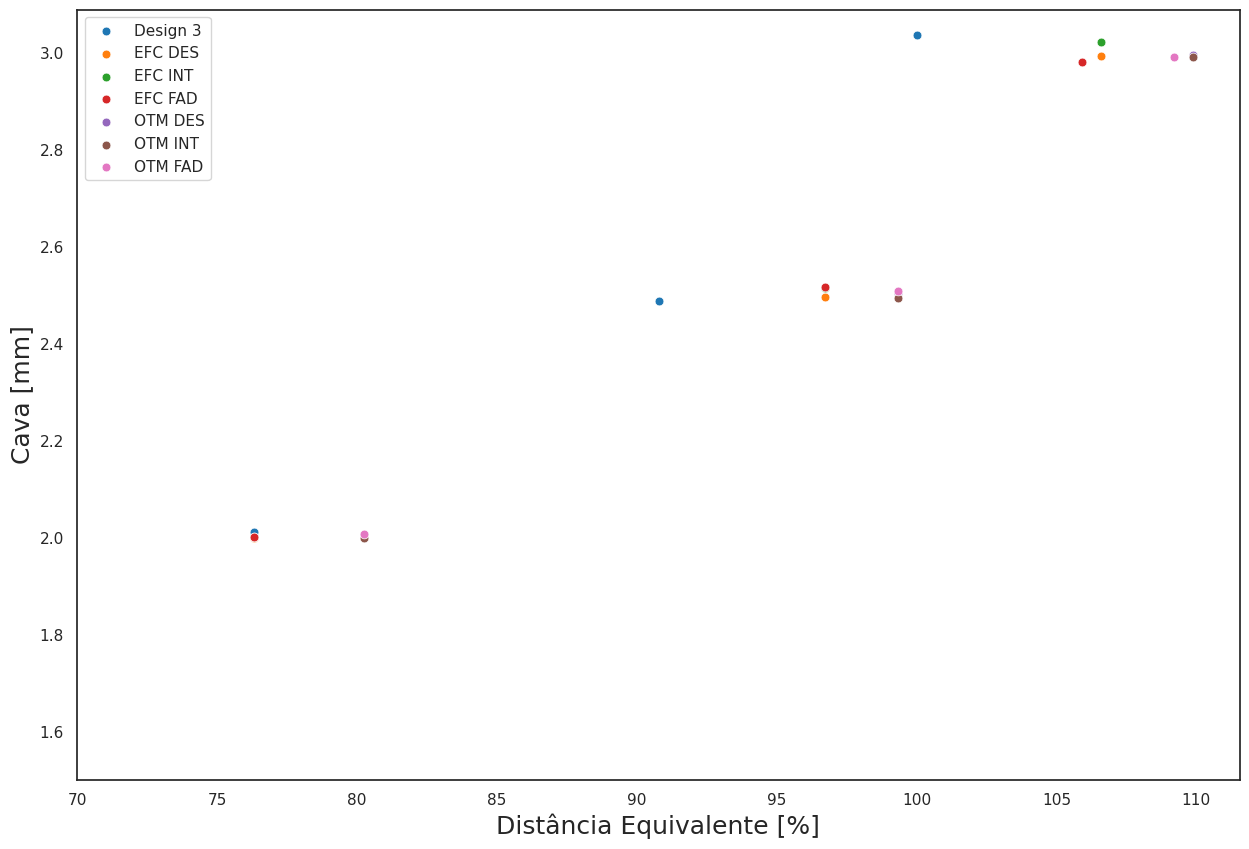

In [121]:
dados = [p_Design_3, p_EFC_DES, p_EFC_INT, p_EFC_FAD, p_OTM_DES, p_OTM_INT, p_OTM_FAD]
perfil = ['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD']
yy = 'Cava'

palette = sns.color_palette("tab10")

sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("white")


    
for df,i,name in zip(dados,range(0,7),perfil):
    
    ax = sns.scatterplot(data = df, x='porcentagem', y='thread_tape' , color = palette[i], s=40, label='%s' % name, )
    #ax = sns.scatterplot(data = df, x='porcentagem', y='thread_maximum' , color = palette[i], s=20)

    
    
ax.set_xlabel("Distância Equivalente [%]",fontsize=18)
ax.set_ylabel('%s [mm]' % yy,fontsize=18) 
ax.set(ylim=(1.5,None),xlim=(70,None))
#plt.savefig("{}_{}.pdf".format(y,a))
plt.show()

In [122]:
teste = pd.concat([p_Design_3, p_EFC_DES, p_EFC_INT, p_EFC_FAD, p_OTM_DES, p_OTM_INT, p_OTM_FAD], keys=['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'],names=['Perfil'])

In [123]:
teste

flange_height  flange_width  thread_maximum  x_thread_maximum  \
Perfil                                                                        
Design 3 57       28.941381     31.611566        2.118793               7.0   
         68       29.417979     31.612102        2.711717              11.0   
         75       29.966821     31.611442        3.317142              13.0   
EFC DES  115      28.934921     30.017157        2.070867               5.0   
         146      29.430075     30.018337        2.604960              12.0   
         161      29.928097     30.017523        3.262953               9.0   
EFC INT  115      28.931179     30.032776        2.073570               7.0   
         146      29.444814     30.031934        2.680005              13.0   
         161      29.952515     30.032670        3.332042               9.0   
EFC FAD  115      28.931345     30.030745        2.073689               7.0   
         146      29.447264     30.029878        2.681195              13.0   
         160      29.911693     30.030695        3.291440               9.0   
OTM DES  121      28.990181     31.138635        2.099568               8.0   
         150      29.488614     31.138753        2.717860              11.0   
         166      29.978926     31.138667        3.289547              13.0   
OTM INT  121      28.952185     31.138436        2.093833               8.0   
         150      29.447722     31.138845        2.705878              11.0   
         166      29.944227     31.138637        3.301676              13.0   
OTM FAD  121      28.955252     31.163259        2.093745               8.0   
         150      29.456672     31.164244        2.712495              11.0   
         165      29.939865     31.163706        3.280178               8.0   

              thread_tape  kilometragem  porcentagem  
Perfil                                                
Design 3 57      2.011124        130500    76.315789  
         68      2.488454        155250    90.789474  
         75      3.036458        171000   100.000000  
EFC DES  115     1.998890        130500    76.315789  
         146     2.494984        165375    96.710526  
         161     2.992308        182250   106.578947  
EFC INT  115     2.000497        130500    76.315789  
         146     2.513526        165375    96.710526  
         161     3.021762        182250   106.578947  
EFC FAD  115     2.000793        130500    76.315789  
         146     2.516101        165375    96.710526  
         160     2.981121        181125   105.921053  
OTM DES  121     2.005441        137250    80.263158  
         150     2.503798        169875    99.342105  
         166     2.994135        187875   109.868421  
OTM INT  121     1.999036        137250    80.263158  
         150     2.494708        169875    99.342105  
         166     2.991130        187875   109.868421  
OTM FAD  121     2.005919        137250    80.263158  
         150     2.507789        169875    99.342105  
         165     2.990682        186750   109.210526

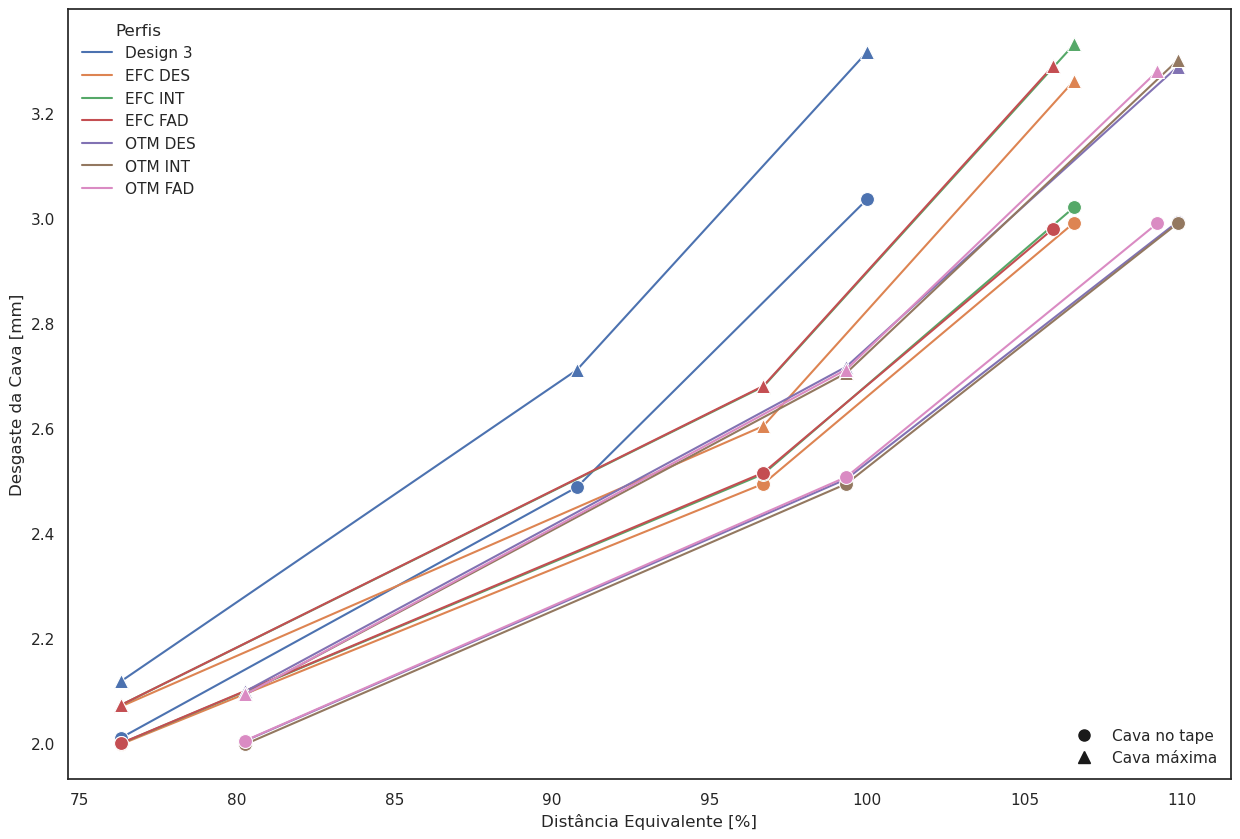

In [233]:
dados = [p_Design_3, p_EFC_DES, p_EFC_INT, p_EFC_FAD, p_OTM_DES, p_OTM_INT, p_OTM_FAD]
perfil = ['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD']
yy = 'Desgaste da Cava'

palette = sns.color_palette("tab10")

sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("white")


ax = sns.lineplot(data = teste, x='porcentagem', y='thread_tape', hue= 'Perfil',marker = 'o',markersize=10)
sns.lineplot(data = teste, x='porcentagem', y='thread_maximum' , hue= 'Perfil', marker ='^', 
             legend = False, markers = '^',markersize=10)
   
ax.set_xlabel("Distância Equivalente [%]")
ax.set_ylabel('%s [mm]' % yy) 
ax.set(ylim=(None,None),xlim=(None,None))

blue_star = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=8)
red_square = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=8)

# specify the lines and labels of the first legend
ax.legend(title = 'Perfis',loc='upper left', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax,handles = [blue_star, red_square], labels = ['Cava no tape','Cava máxima'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

#plt.savefig("{}_{}.pdf".format(y,a))
plt.show()

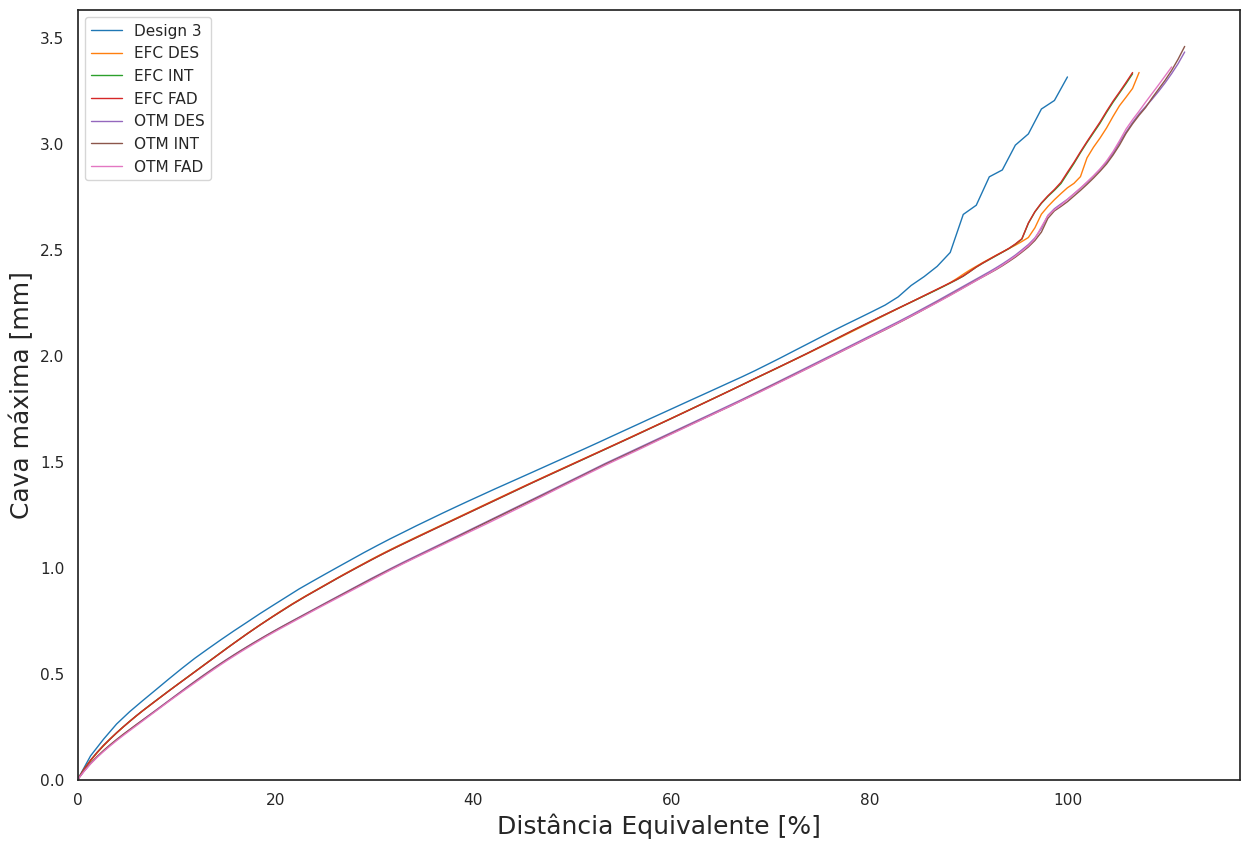

In [32]:
plotkm('Cava máxima','thread_maximum',[Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD],['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'])

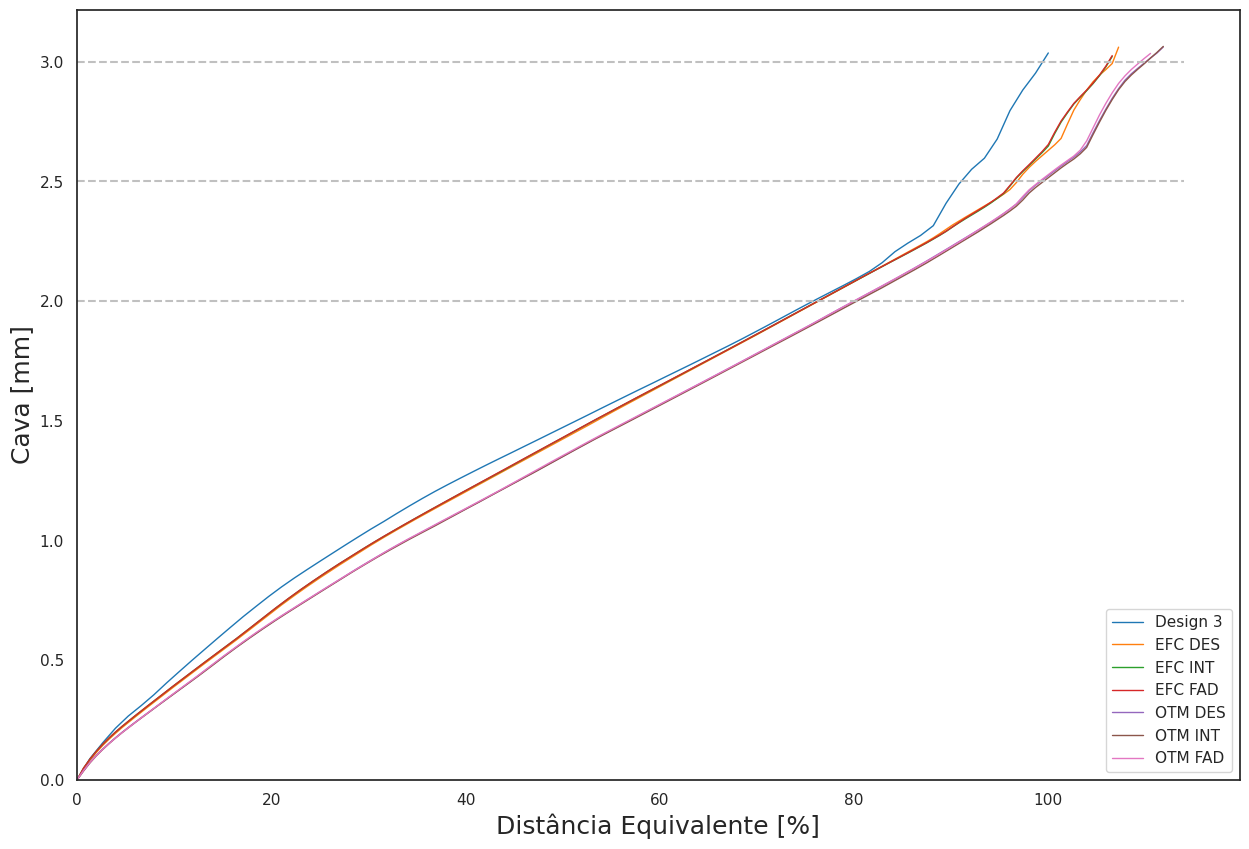

In [98]:
plotkm('Cava','thread_tape',[Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD],['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'])

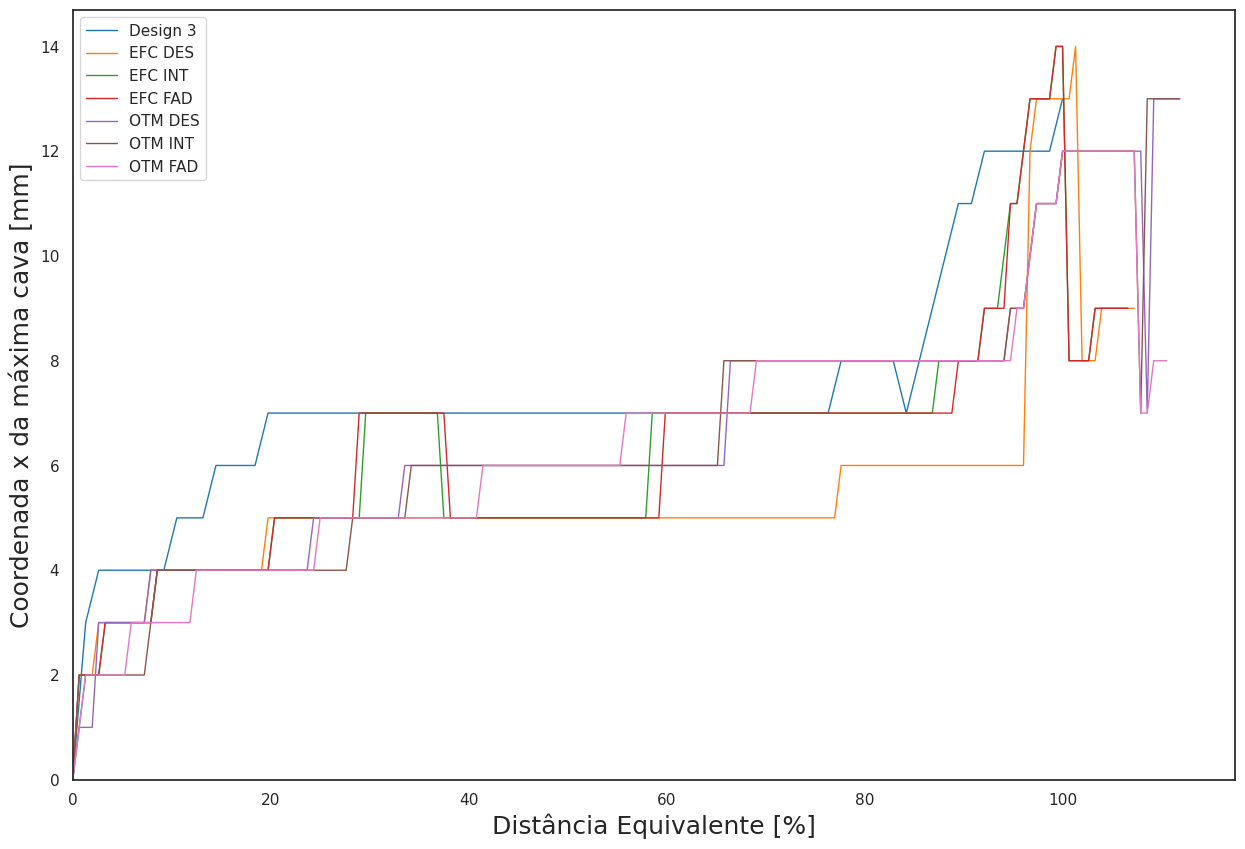

In [37]:
plotkm('Coordenada x da máxima cava','x_thread_maximum',[Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD],['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'])

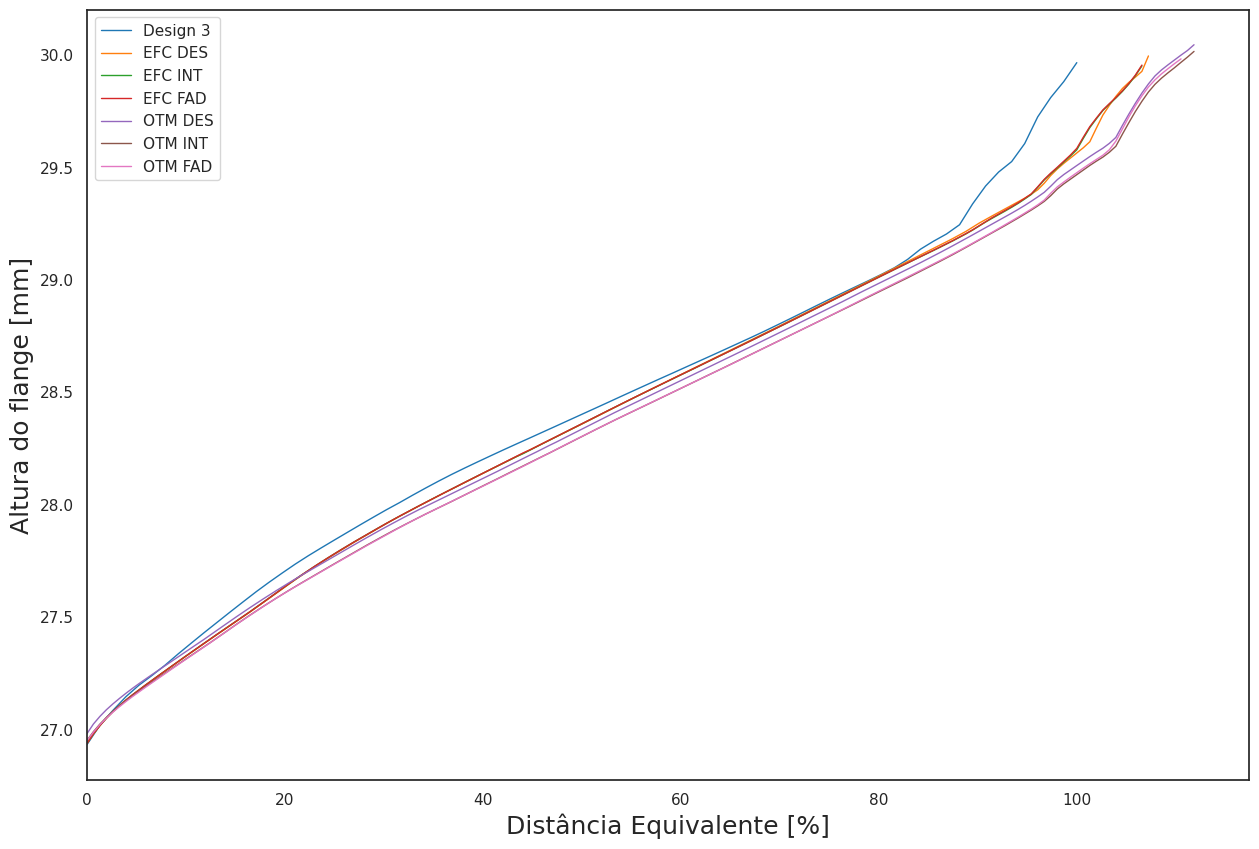

In [30]:
plotkm('Altura do flange','flange_height',[Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD],['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'])

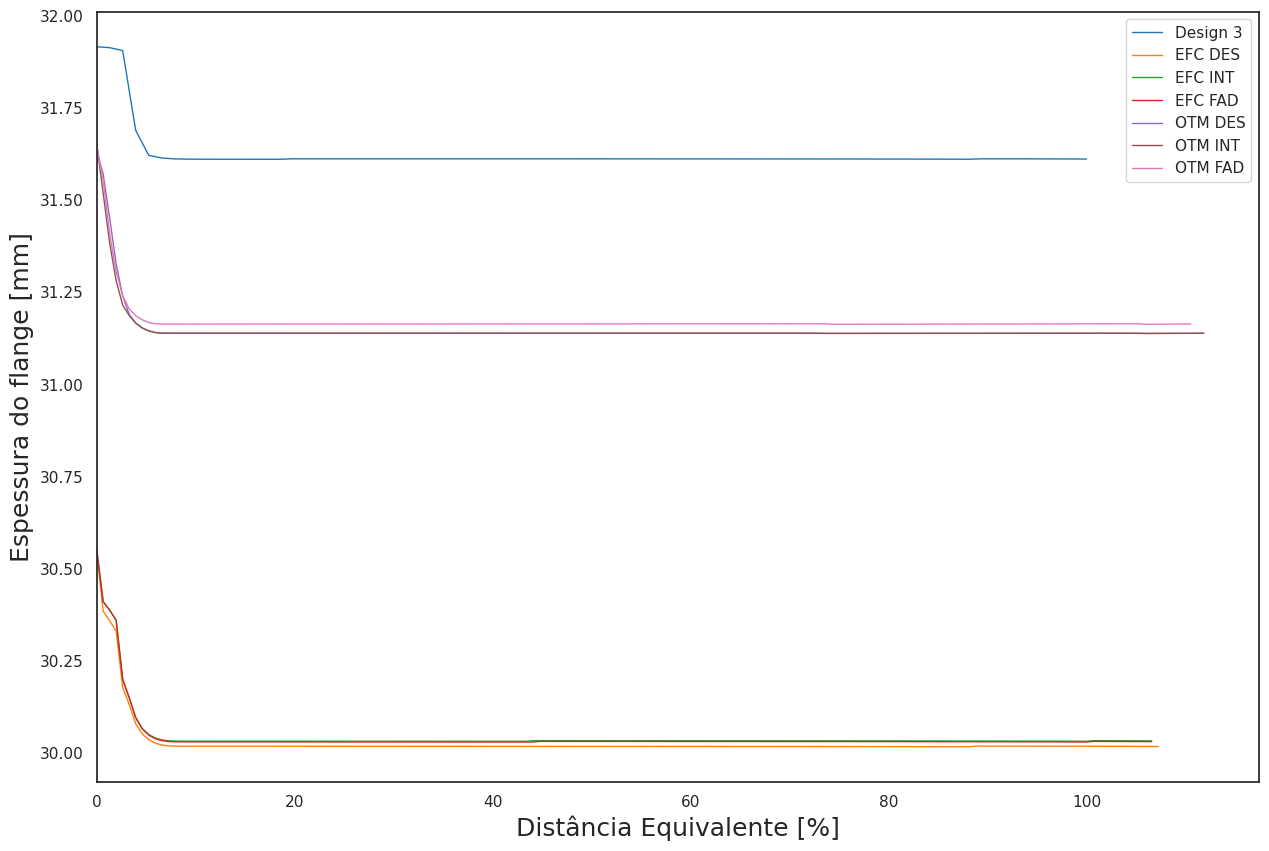

In [34]:
plotkm('Espessura do flange','flange_width',[Design_3, EFC_DES, EFC_INT, EFC_FAD, OTM_DES, OTM_INT, OTM_FAD],['Design 3','EFC DES','EFC INT','EFC FAD','OTM DES','OTM INT','OTM FAD'])